In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
# mounting notebook on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
play_store_df = pd.read_csv("/content/drive/MyDrive/Module 1/Capstone_Project_1/Play Store Data.csv")
user_df = pd.read_csv("/content/drive/MyDrive/Module 1/Capstone_Project_1/User Reviews.csv")

## Exploring Dataset

**Apps dataset columns descriptions:**

There are 9 features that describe a given app.

* **App:** Name of the app
* **Category:** Category of the app.
* **Rating**: The current average rating (out of 5) of the app on Google Play
* **Reviews**: Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs:** Number of times the app was downloaded from Google Play
* **Type**: Whether the app is paid or free
* **Price**: Price of the app in US$
* **Last Updated**: Date on which the app was last updated on Google Play

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**There are three main columns in the User Review dataset - Sentiment, Sentiment_Polarity and Sentiment_Subjectivity.**
  * **Sentiment:** sentiment is the view or opinion of the user about the app. the opinion may be Positive, Negative or Neutral.
  * **Sentiment_Polarity:** column contains values from -1 to 1. Where -1 is the most negative polarity and 1 is the most positive polarity. This column can also contain 0 which means neutral polarity.
  * **Sentiment_Subjectivity:** contains values ranging from 0 to 1 output that refers to personal opinions and judgments

In [ ]:
play_store_df.shape

(9649, 13)

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 10712 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   float64       
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   float64       
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


In [ ]:
play_store_df['Rating'].describe()

count    9649.000000
mean        4.192507
std         0.496195
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

## Data Cleaning

Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis.

## Category

In [ ]:
play_store_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [ ]:
play_store_df[play_store_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


* We can make NaN 'category' value. At that time we can get a clean data. I used shift() method that is found Pandas library.
* Also the rating is above 5. we will check futher if any ratings are above 5

In [ ]:
play_store_df.loc[10472] = play_store_df.loc[10472].shift()
play_store_df['App'].loc[10472] = play_store_df['Category'].loc[10472]
play_store_df['Category'].loc[10472] = np.nan
play_store_df.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

Later i realised that shifting these values wont help in betterment of data. so i had to drop this row.😅

In [ ]:
play_store_df.drop([10472], inplace=True)

## Rating

In [ ]:
# Recheck
play_store_df[play_store_df['Rating'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# checking how many rating are more than 5 outlier
play_store_df[play_store_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
play_store_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2], dtype=object)

Data type of Rating is object. If we convert from string to numeric, we can make easy

In [ ]:
play_store_df['Rating'] = pd.to_numeric(play_store_df['Rating'], errors='coerce')  # Using errors='coerce' bcuz It will replace all non-numeric values with NaN
play_store_df['Rating'].dtype


dtype('float64')

## Reviews

In [ ]:
play_store_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
play_store_df['Reviews'] = play_store_df.Reviews.replace("0.0",0)
play_store_df['Reviews'] = play_store_df['Reviews'].astype(float)
play_store_df['Reviews'].dtype


dtype('float64')

## Size

In [ ]:
play_store_df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [ ]:
play_store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.

In [ ]:
play_store_df['Size'] = play_store_df.Size.replace("Varies with device",np.nan)
play_store_df['Size'] = play_store_df.Size.str.replace("M","000") # All size values became the kilobyte type.
play_store_df['Size'] = play_store_df.Size.str.replace("k","")
play_store_df['Size'] = play_store_df.Size.replace("1,000+",1000)
play_store_df['Size'] =play_store_df['Size'].astype(float)
play_store_df['Size'].dtype


dtype('float64')

## Installs

In [ ]:
play_store_df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [ ]:
play_store_df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [ ]:
play_store_df['Installs'] = play_store_df.Installs.str.replace(",","")
play_store_df['Installs'] = play_store_df.Installs.str.replace("+","")
play_store_df['Installs'] = play_store_df.Installs.replace("Free",np.nan)
play_store_df['Installs'] = play_store_df['Installs'].astype(float)
play_store_df['Installs'].dtype


<ipython-input-27-c4b4cb629c83>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Installs'] = play_store_df.Installs.str.replace("+","")


dtype('float64')

##  Price

In [ ]:
play_store_df.Price.value_counts().head(10)

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
$3.99       63
$1.49       46
$5.99       30
$2.49       26
$9.99       21
Name: Price, dtype: int64

In [ ]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [ ]:
play_store_df['Price'] = play_store_df.Price.replace("Everyone",np.nan)
play_store_df['Price'] = play_store_df.Price.str.replace("$","").astype(float)
play_store_df['Price'].dtype

<ipython-input-30-5b0d97a575bf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Price'] = play_store_df.Price.str.replace("$","").astype(float)


dtype('float64')

## Last Updated

In [ ]:
play_store_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

Data type of Last Uptated is object. I converted from string to date type.

In [ ]:
play_store_df['Last Updated'] = pd.to_datetime(play_store_df['Last Updated'])
play_store_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

## Data Imputation

In [ ]:
def impute_median(column):
  '''
  Imputing median value as NaN value for Numerical datatype.
  For 'Rating' and 'Size' column - Replacing NaN values with the median of a DataFrame column.
  '''
  return column.fillna(column.median(), inplace=True)

In [ ]:
# replacing NaN values with median value for Size column
impute_median(play_store_df['Size'])

In [ ]:
# replacing NaN values with median value for Rating column
impute_median(play_store_df['Rating'])

In [ ]:
def impute_mode(column):
  '''
  Imputing mode value as NaN value for Categorical datatype.
  For 'Type' column - Replacing NaN values with the mode of a DataFrame column.
  '''
  return column.fillna(str(column.mode()), inplace=True)

In [ ]:
# replacing NaN values with mode value for Type column
impute_mode(play_store_df['Type'])

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

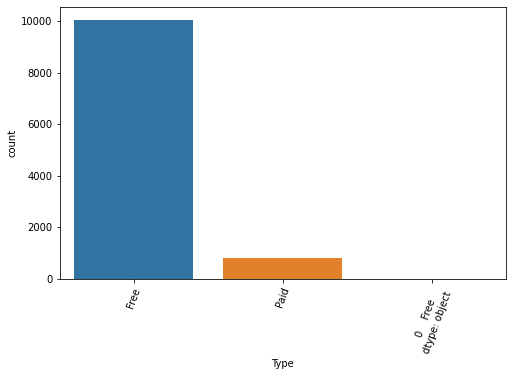

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=play_store_df)
plt.xticks(rotation=70)

Sometimes Replacing NaN value in categorical column using mode function tend to give incorrect visualization/resuts and also you can see here it has created another sepearate column, which is an error so i assigned it with "Free"

In [ ]:
play_store_df.loc[9148,'Type']='Free'

In [ ]:
play_store_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9277,EF English Live for tablets,FAMILY,3.1,1242.0,14000.0,50000.0,Free,0.0,Everyone,Education,2018-04-24,1.7.0,4.4 and up
6528,BN MALLORCA Radio,COMMUNICATION,4.3,23.0,13000.0,1000.0,Free,0.0,Everyone,Communication,2017-11-29,2.0.14.4,2.3 and up
9472,Dubai Racing,GAME,4.2,16237.0,23000.0,500000.0,Free,0.0,Everyone,Racing,2015-12-23,1.9.1,2.3 and up
8673,that's lit,GAME,4.7,1115.0,39000.0,100000.0,Free,0.0,Everyone,Arcade,2017-07-07,1.0,4.3 and up
6807,Jabbla BT,TOOLS,5.0,3.0,55.0,100.0,Free,0.0,Everyone,Tools,2014-10-06,1.0,4.2 and up


In [ ]:
play_store_df[play_store_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11000.0,1000.0,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000.0,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


In [ ]:
play_store_df=play_store_df[play_store_df['Android Ver'].notna()]
play_store_df.shape

(10838, 13)

In [ ]:
play_store_df[play_store_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7,5000.0,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11.0,1000000.0,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.7,500000.0,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0.0,222.0,100.0,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14000.0,50000.0,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44.0,7.2,10000.0,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1.0,237.0,10.0,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8.0,658.0,1000.0,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up


Since there are only 8 rows which contain NaN values in the 'Current Ver' column and there is no particular value with which we can replace it, these rows can be dropped.

In [ ]:
play_store_df=play_store_df[play_store_df["Current Ver"].notna()]
play_store_df.shape

(10830, 13)

In [ ]:
play_store_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10830.000000,1.083000e+04,10830.000000,1.083000e+04,10830.000000
mean,4.206519,4.445607e+05,18565.341311,1.547847e+07,1.027996
std,0.480446,2.929081e+06,22215.733756,8.506734e+07,15.957044
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,5.000000e+03,0.000000
50%,4.300000,2.099500e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.481300e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  float64       
 4   Size            10830 non-null  float64       
 5   Installs        10830 non-null  float64       
 6   Type            10830 non-null  object        
 7   Price           10830 non-null  float64       
 8   Content Rating  10830 non-null  object        
 9   Genres          10830 non-null  object        
 10  Last Updated    10830 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10830 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.2+ MB


## Handling Duplicate Values

In [ ]:
play_store_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

From the above data we can see that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will get the information for the latest entry in the database.

In [ ]:
play_store_df[play_store_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In ROBLOX app, it should be either from game category or from family catagory.

In [ ]:
# sorting the dataset in descending order of Last Updated date.
play_store_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [ ]:
# deleting the duplicate entries of App.
play_store_df.drop_duplicates(subset = ['App'], inplace = True)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
play_store_df[play_store_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1870,ROBLOX,GAME,4.5,4449910.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [ ]:
play_store_df.shape

(9649, 13)

## User Review Dataframe

In [ ]:
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_df.shape

(64295, 5)

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

Lets check if there are any exceptions.

In [ ]:
user_df[user_df['Translated_Review'].isnull() & user_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [ ]:
user_df.dropna(inplace = True)

In [ ]:
user_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
user_df.shape

(37427, 5)

## Data Visualization

## Correlation Heatmap for playstore data

In [ ]:
play_store_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050263,0.038518,0.034397,-0.018587
Reviews,0.050263,1.000000,0.072603,0.625037,-0.007594
Size,0.038518,0.072603,1.000000,0.041270,-0.020402
Installs,0.034397,0.625037,0.041270,1.000000,-0.009416
Price,-0.018587,-0.007594,-0.020402,-0.009416,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

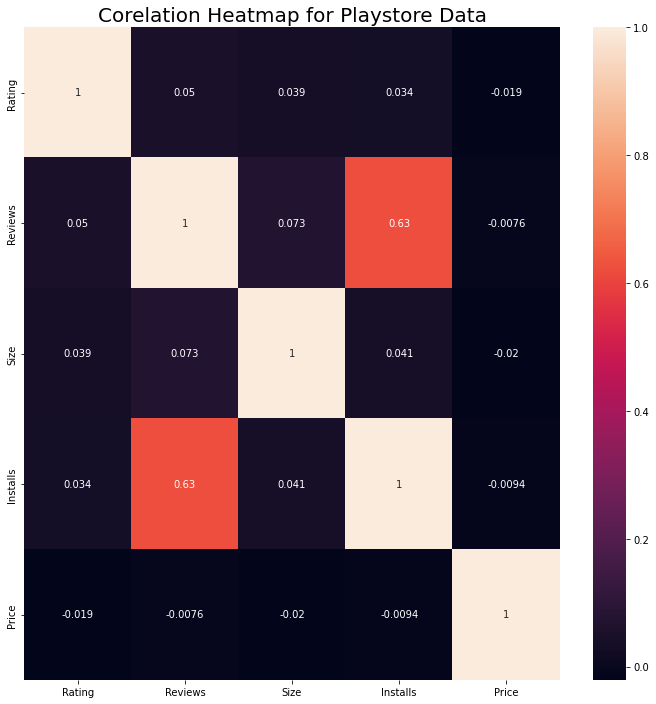

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(play_store_df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

* There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
*The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

##Number of apps based on Category

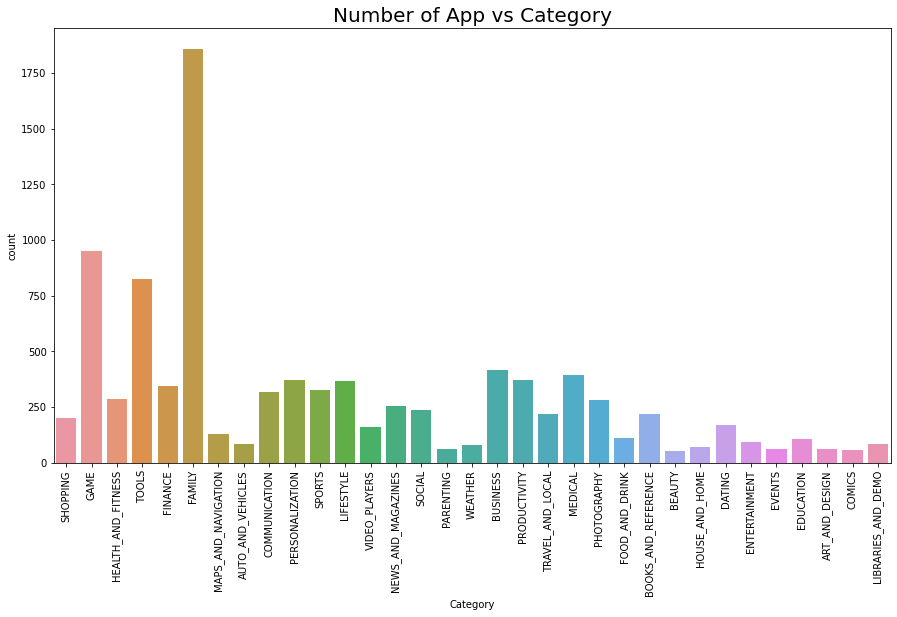

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Number of App vs Category', fontsize=20)

sns.countplot(x='Category', data=play_store_df)
plt.xticks(rotation=90)
plt.show()

* FAMILY category has the highest number of apps and BEAUTY category has lowest number of apps.
* Top 5 category in the play store which have most number of apps are - FAMILY, GAME, TOOLS, BUSINESS & MEDICAL

## Distribution of Rating

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


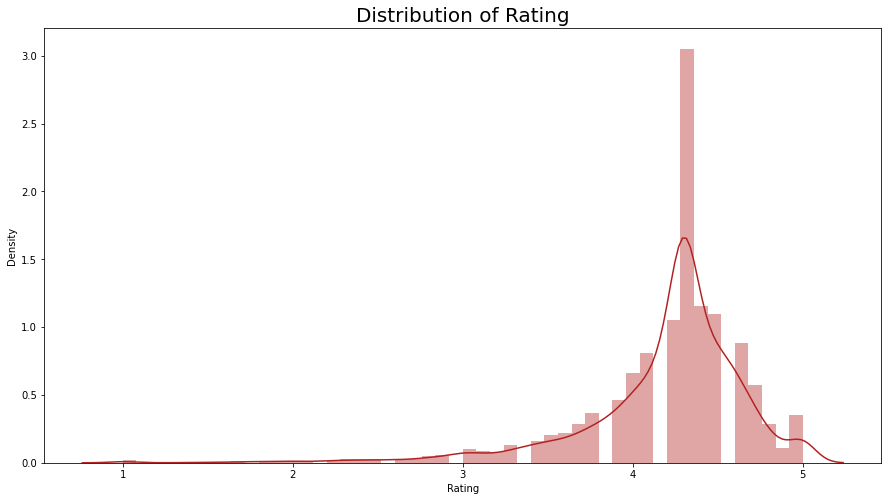

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Rating', fontsize=20)
sns.distplot(play_store_df['Rating'],color='firebrick')

Most of the apps in the google play store are rated between 3.5 to 4.3

##Box plot to show Rating vs Category

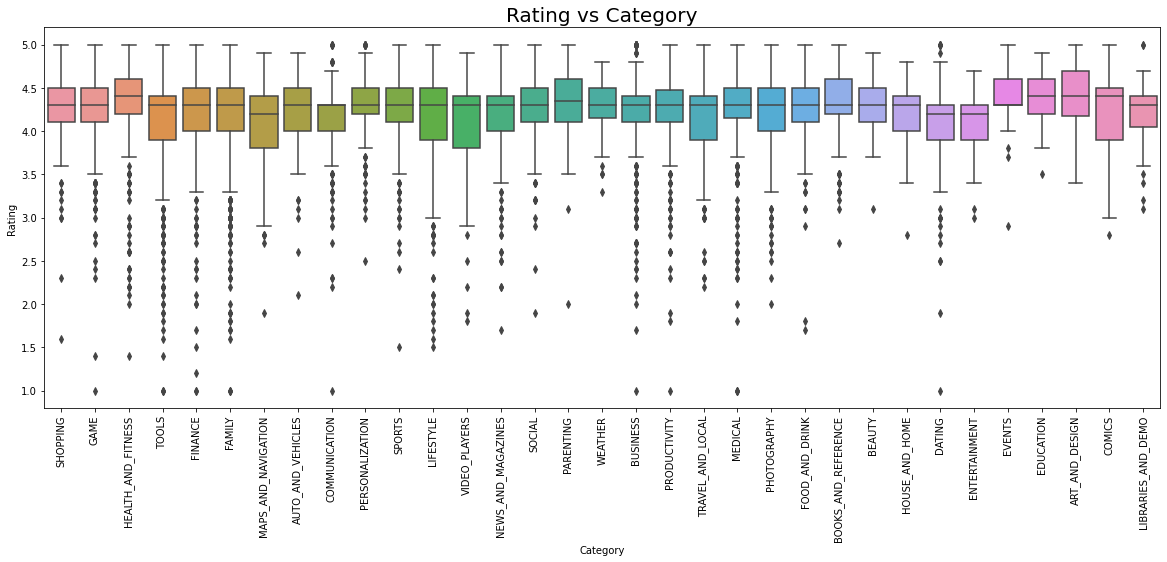

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Rating vs Category", fontsize=20)

sns.boxplot(x='Category', y='Rating', data=play_store_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
cat_rating = play_store_df.groupby(['Category'])['Rating'].median().reset_index(name = 'median')
cat_rating.sort_values(by ='median', ascending = False, inplace = True)
cat_rating.head()

,Category,median
0,ART_AND_DESIGN,4.40
5,COMICS,4.40
15,HEALTH_AND_FITNESS,4.40
8,EDUCATION,4.40
22,PARENTING,4.35


In [ ]:
cat_rating.tail()

,Category,median
2,BEAUTY,4.3
32,WEATHER,4.3
19,MAPS_AND_NAVIGATION,4.2
9,ENTERTAINMENT,4.2
7,DATING,4.2


* Top 5 Category with highest ratings are - ART_AND_DESIGN, COMICS, EDUCATION, HEALTH_AND_FITNESS, EDUCATION, PARENTING
* Last 5 Category with lowest ratings are- DATING, ENTERTAINMENT, MAPS_AND_NAVIGATION, WEATHER, BEAUTY

##Top categories on Google Playstore

In [ ]:
# Top 10 installed apps
play_store_df.Category.value_counts()

FAMILY                 1860
GAME                    951
TOOLS                   827
BUSINESS                419
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               109
ENTERTAINMENT            92
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
PARENTING                60
ART_AND_DESIGN           60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
def findtop10incategory(str):
  '''
  This function used for find out top 10 app present in Category column,
  with thier each respective category.
  '''
  str = str.upper()
  top10 = play_store_df[play_store_df['Category'] == str]
  top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
  
  plt.figure(figsize=(15,12))
  plt.title(f'Top 10 Installed Apps in {str} category',size = 20)  
  
  graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
  plt.xticks(rotation=90)

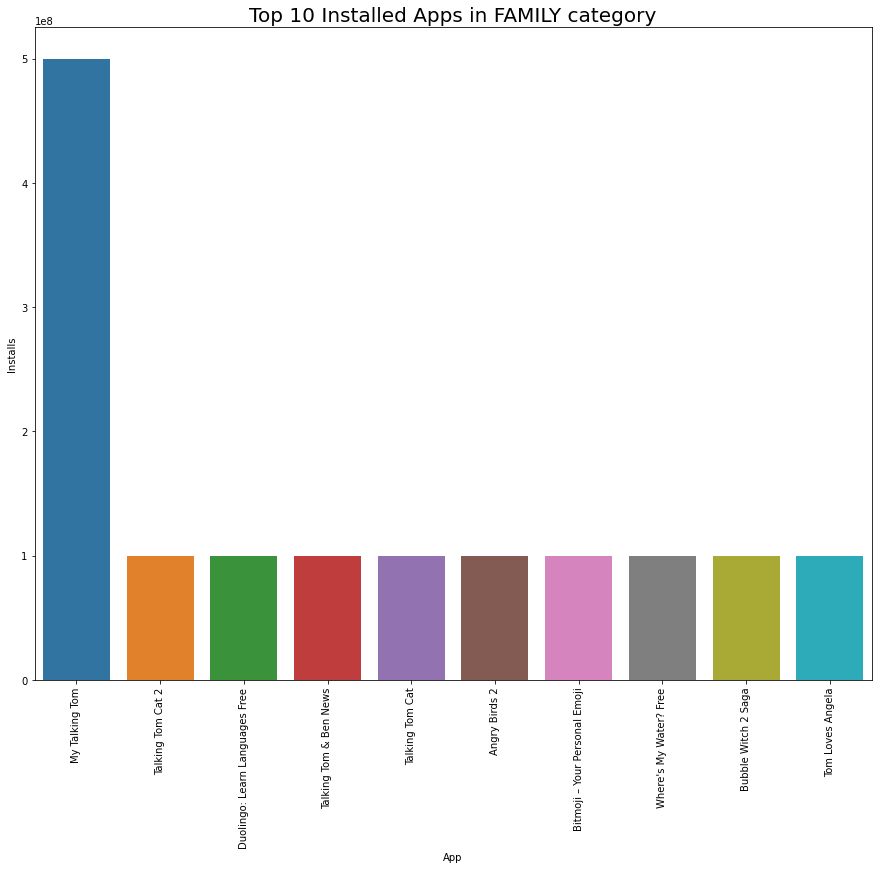

In [ ]:
findtop10incategory('FAMILY')

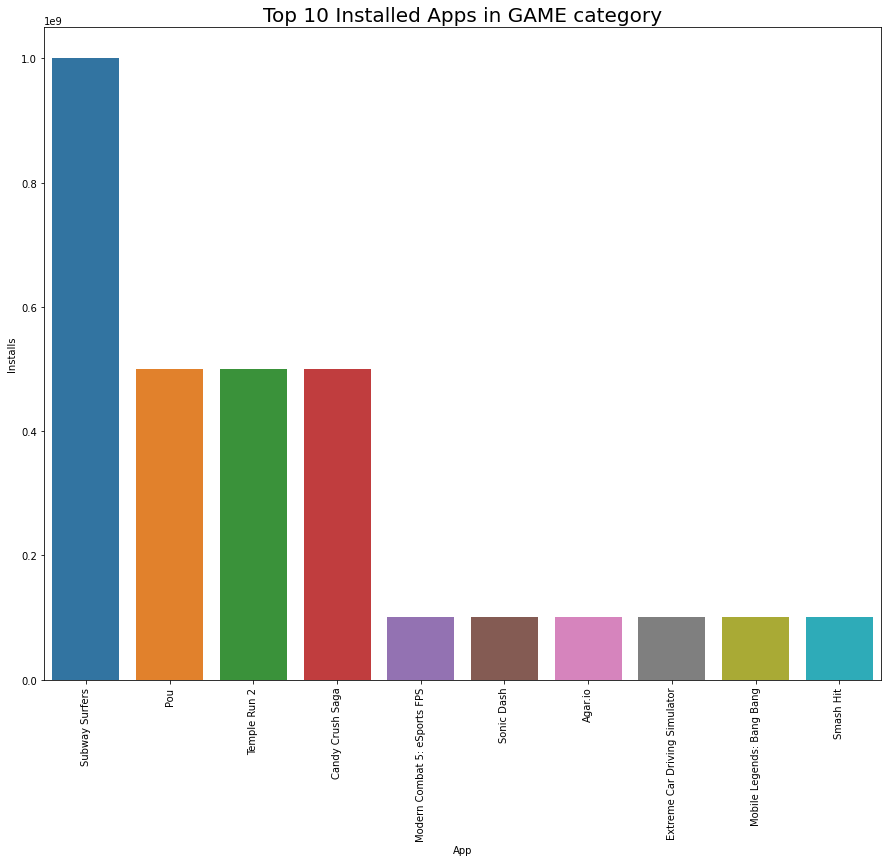

In [ ]:
findtop10incategory('Game')

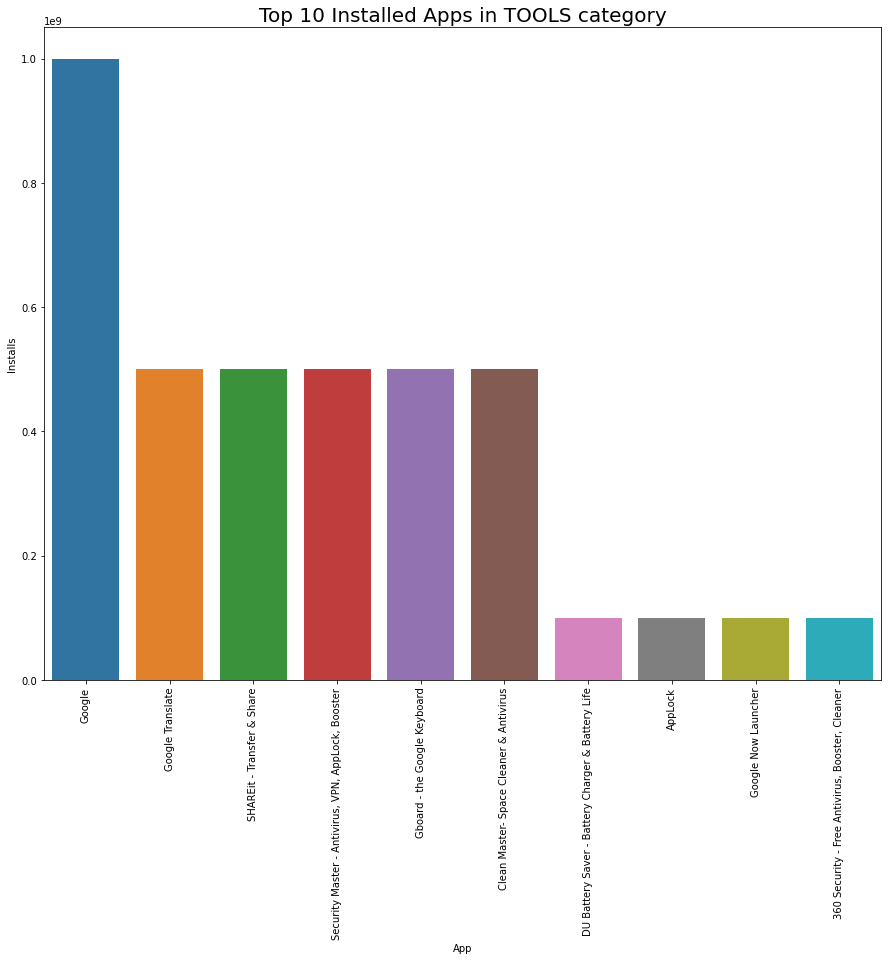

In [ ]:
findtop10incategory('Tools')

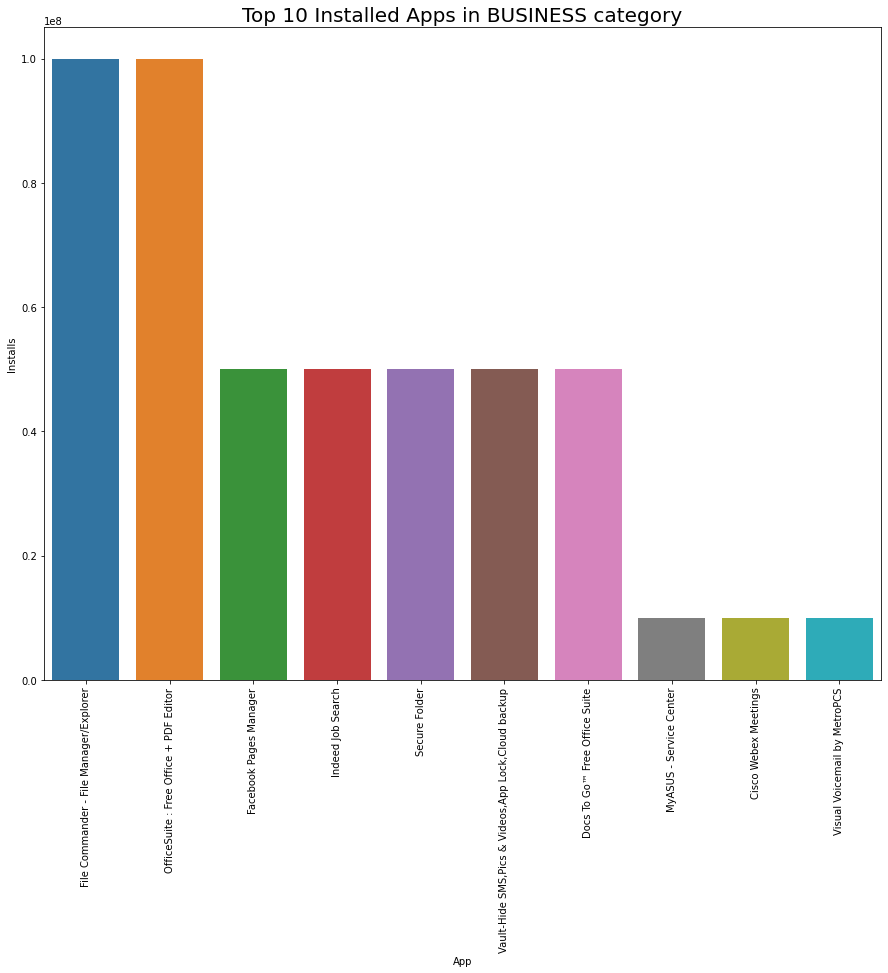

In [ ]:
findtop10incategory('Business')

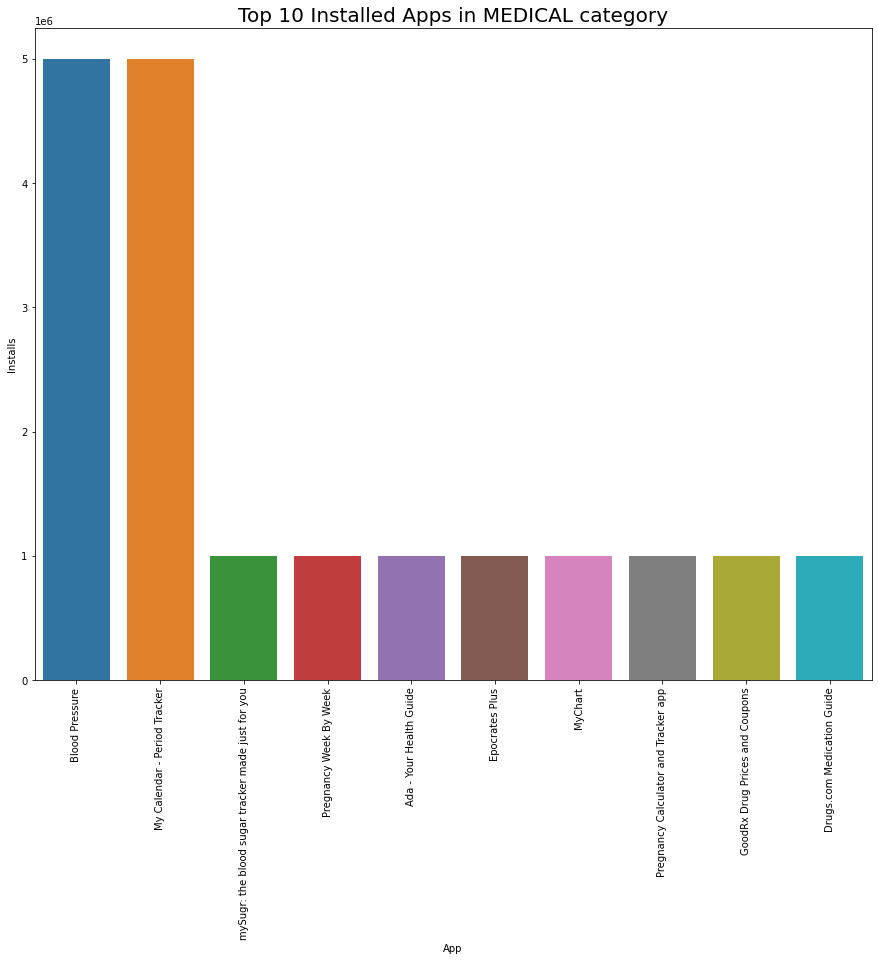

In [ ]:
findtop10incategory('Medical')

##Number of Apps vs Genres

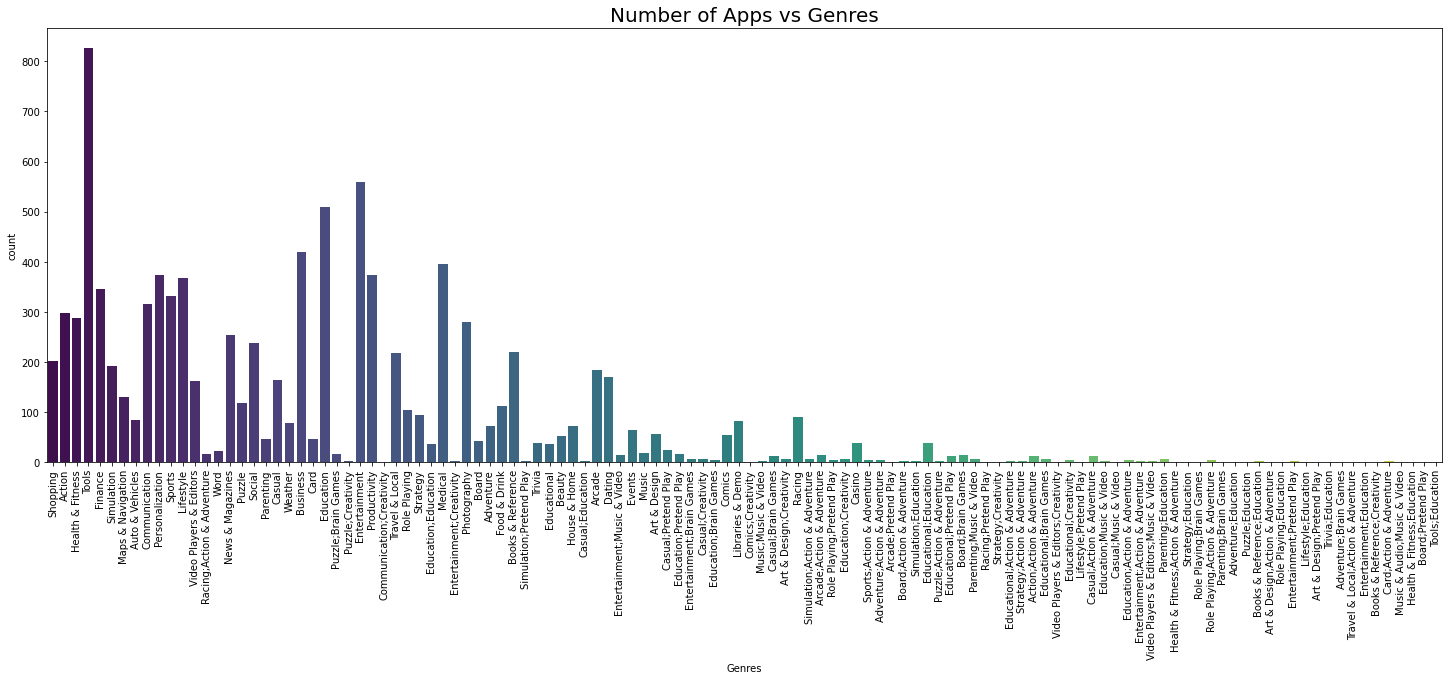

In [ ]:
plt.figure(figsize=(25,8))
plt.title("Number of Apps vs Genres", fontsize=20)

ax=sns.countplot(x = 'Genres', data = play_store_df, palette= "viridis")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
gen_count = play_store_df.groupby(['Genres']).size().reset_index(name = 'count')
gen_count.sort_values(by ='count', ascending = False, inplace = True)
gen_count.head()

,Genres,count
107,Tools,826
51,Entertainment,560
38,Education,509
22,Business,419
70,Medical,395


In [ ]:
gen_count.tail()

,Genres,count
86,Puzzle;Education,1
76,Parenting;Brain Games,1
5,Adventure;Education,1
31,Casual;Music & Video,1
12,Art & Design;Pretend Play,1


* Least number of apps in play store are - Puzzle;Education, Parenting;Brain Games, Adventure;Education, Casual;Music & Video, Art & Design;Pretend Play.
* Most number of apps in play store are - Tools, Entertainment, Education, Business & Medical.

##which Category of Apps have more Content Rating ?

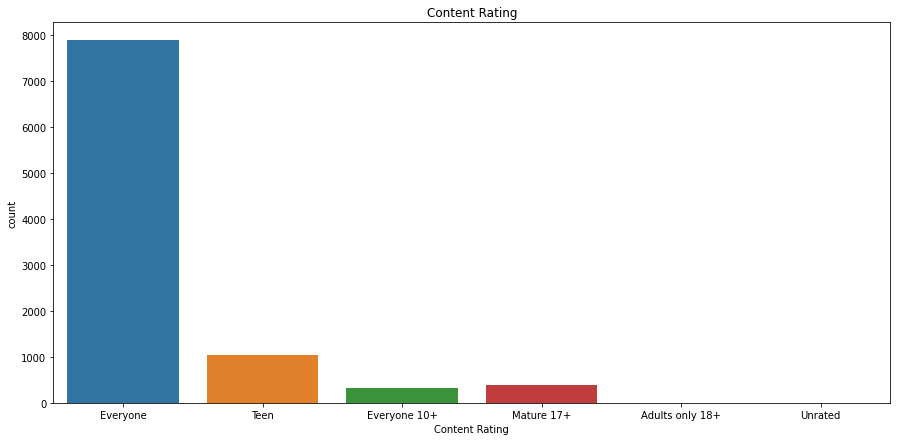

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Content Rating")

sns.countplot(x = 'Content Rating', data = play_store_df)
plt.show()

A majority of the apps in the play store are can be used by everyone.The remaining apps have various age restrictions to use it

##What is the ratio of number of Paid apps and Free apps?

In [ ]:
app_type_count=play_store_df.Type.value_counts()
app_type_count

Free    8898
Paid     751
Name: Type, dtype: int64

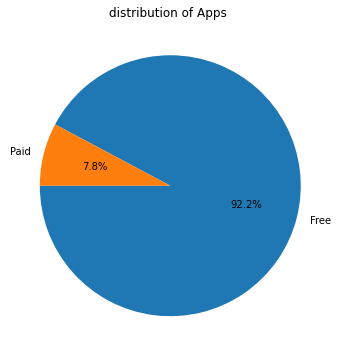

In [ ]:
plt.figure(figsize=(12,6))
plt.title("distribution of Apps ")
plt.pie(app_type_count, labels=app_type_count.index, autopct='%1.1f%%', startangle=180);

##Apps that have made the highest-earning

In [ ]:
paid_df=play_store_df[play_store_df['Type']=='Paid']

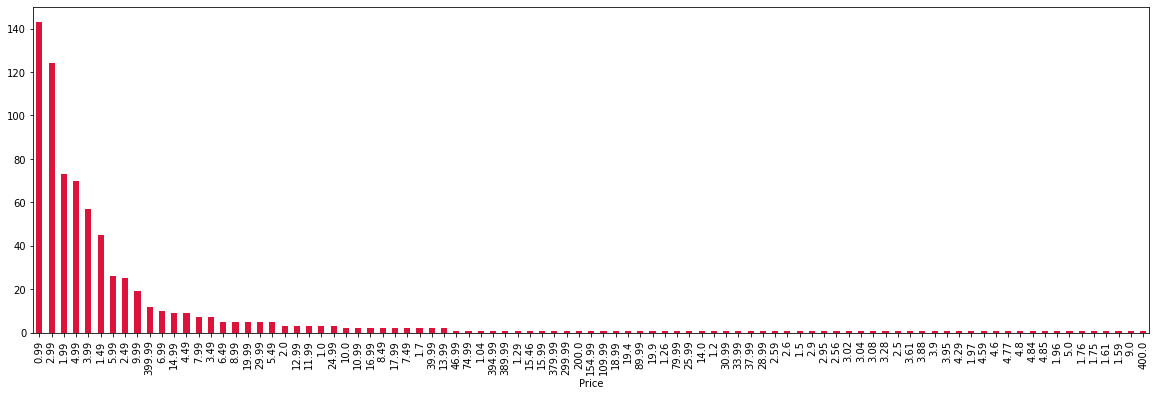

In [ ]:
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Total Earning = (Number of installs)x(Price to install the app)


In [ ]:
Paid_Apps_df = play_store_df[play_store_df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price']

In [ ]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


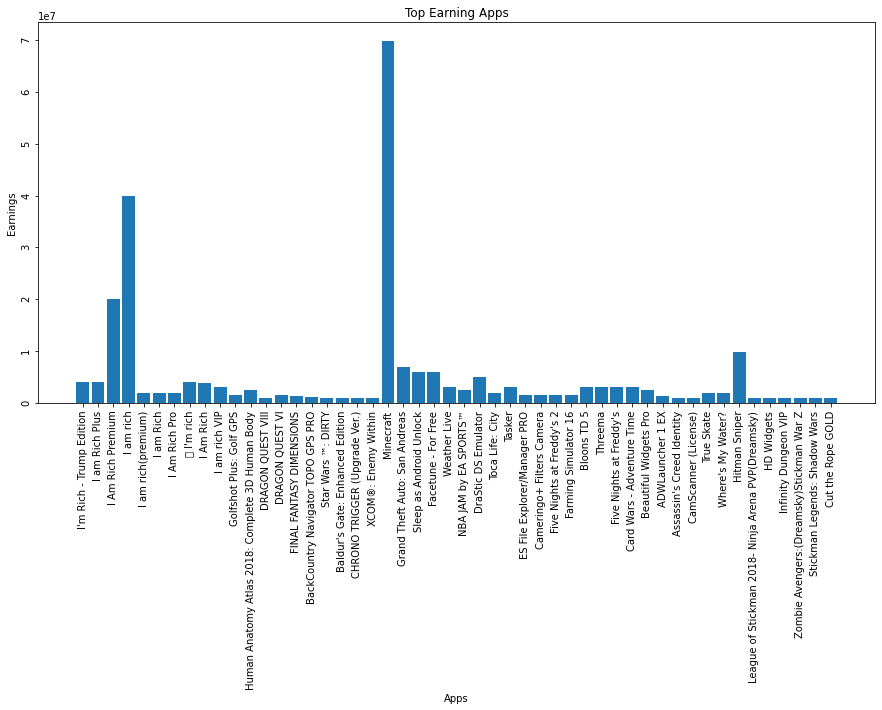

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Top Earning Apps")
plt.xlabel("Apps")
plt.ylabel("Earnings")

plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=0.85, label=earning_df_sorted_by_Price.Earnings)
plt.tick_params(rotation=90)
plt.show()

The top five apps with the highest earnings found on google play store are:-

1. Minecraft, I am Rich
2. I am Rich
3. I am Rich Premium
4. Hitman Sniper
5. Grand Theft Auto: San Andreas

## Top apps that are free

In [ ]:
# Creating a df for only free apps
free_df = play_store_df[play_store_df['Type'] == 'Free']

In [ ]:
top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3565,Google Drive,PRODUCTIVITY,4.4,2731211.0,13000.0,1.000000e+09,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707.0,13000.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,13000.0,1.000000e+09,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,13000.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493.0,13000.0,1.000000e+09,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,13000.0,1.000000e+09,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
4096,Gmail,COMMUNICATION,4.3,4604324.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device


In [ ]:
top_free_df['App']

3565                                Google Drive
3232                          Google Street View
2884                               Google Photos
3687                     Google Play Movies & TV
2544                                    Facebook
391                Skype - free IM & video calls
381                           WhatsApp Messenger
3234                                      Google
152                            Google Play Books
4096                                       Gmail
3665                                     YouTube
335     Messenger – Text and Video Chat for Free
338                 Google Chrome: Fast & Secure
9844                                 Google News
2545                                   Instagram
3223                   Maps - Navigate & Explore
2554                                     Google+
386                                     Hangouts
865                            Google Play Games
1700                              Subway Surfers
Name: App, dtype: ob

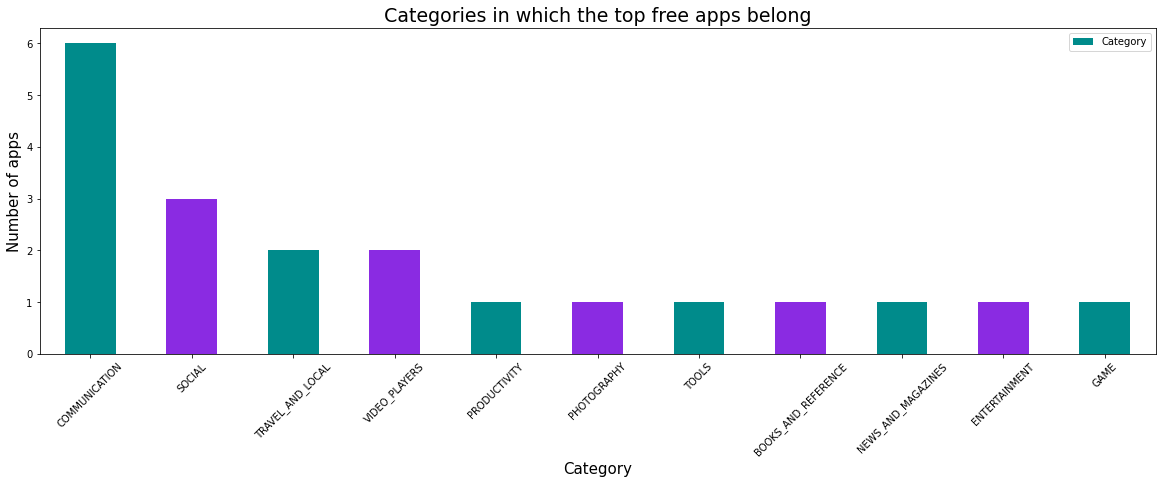

In [ ]:
# Categories in which the top free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()


##Distribution of Size

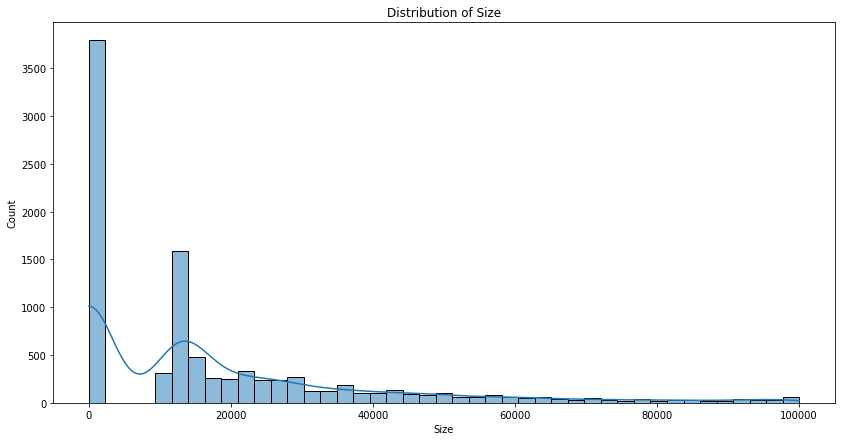

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Size")

sns.histplot(play_store_df['Size'], kde = True)
plt.show()

* Most of the apps are of smaller size.
* Most of the apps are present in 5Mb-20Mb size in play store.

## Merging the User Review dataset with the Play Store dataset.

In [ ]:
final_df = play_store_df.merge(user_df, on = 'App')
final_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
31006,Frontback - Social Photos,SOCIAL,3.8,19446.0,13000.0,1000000.0,Free,0.0,Mature 17+,Social,2017-12-01,3.4.5,4.0.3 and up,Scrap,Neutral,0.0000,0.00
32946,DINO HUNTER: DEADLY SHORES,GAME,4.4,1381624.0,54000.0,10000000.0,Free,0.0,Teen,Action,2017-03-14,3.1.1,3.0 and up,This game kept hands becoming devils.... cutte...,Negative,-0.0750,0.56
16448,Color Road,GAME,4.1,84911.0,71000.0,10000000.0,Free,0.0,Everyone,Arcade,2018-07-19,2.5.0,4.1 and up,"Bought ads, still seeing x-rated video ad. Be ...",Negative,-0.3125,0.65
1548,Arrow.io,GAME,4.5,343263.0,13000.0,10000000.0,Free,0.0,Everyone 10+,Action,2018-08-06,1.2.6,4.0.3 and up,It lage good game,Positive,0.1500,0.50
23351,Content Transfer,PRODUCTIVITY,4.7,19302.0,7.2,5000000.0,Free,0.0,Everyone,Productivity,2018-06-28,3.5.12,4.0.3 and up,The thing I like I accept downloaded transfer....,Neutral,0.0000,0.00


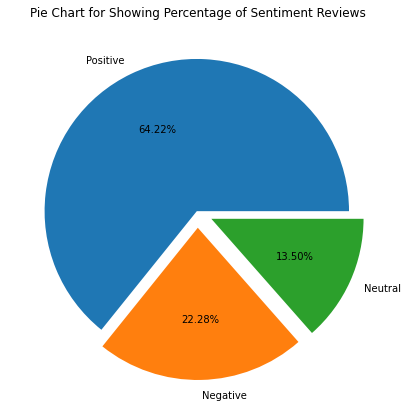

In [ ]:
plt.figure(figsize = (7,7))
plt.title('Pie Chart for Showing Percentage of Sentiment Reviews')

final_df['Sentiment'].value_counts().plot.pie(autopct = '%1.2f%%', explode=(0.01,0.1,0.1))
plt.axis('off')
plt.show()

The graph shows that there are 64.22% positive reviews, 13.50% Neutral reviews and 22.28% Negative reviews.

##Distribution of Sentiment Polarity

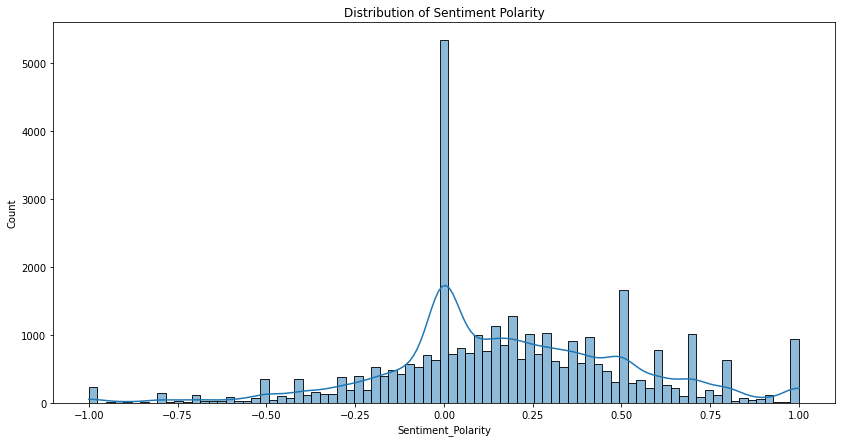

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Polarity")

sns.histplot(final_df['Sentiment_Polarity'], kde = True)
plt.show()

1. The above graph shows that the width of the distribution is more towards the left of the graph which makes it left skewed.
2. The Polarity of most of the users is towards the positive side as we already saw in the pie chart. Also, most of the reviews are having 0 polarity.

##Histogram plot of Sentiment Subjectivity

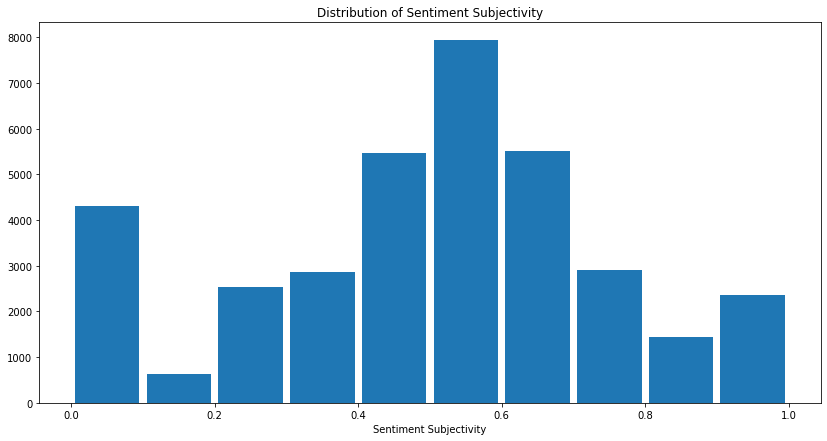

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Subjectivity")

plt.hist(final_df['Sentiment_Subjectivity'], rwidth = 0.90)
plt.xlabel("Sentiment Subjectivity")
plt.show()

Highest sentiment subjectivity lies between 0.4 to 0.7 which shows that most of the reviews are towards subjective point of view of the users.

##Number of Apps vs Category with Reviews Sentiment Stacking

In [ ]:
cat_sentiment= final_df.groupby(['Category', 'Sentiment']).size().reset_index().pivot(columns = 'Sentiment', index = 'Category', values = 0)

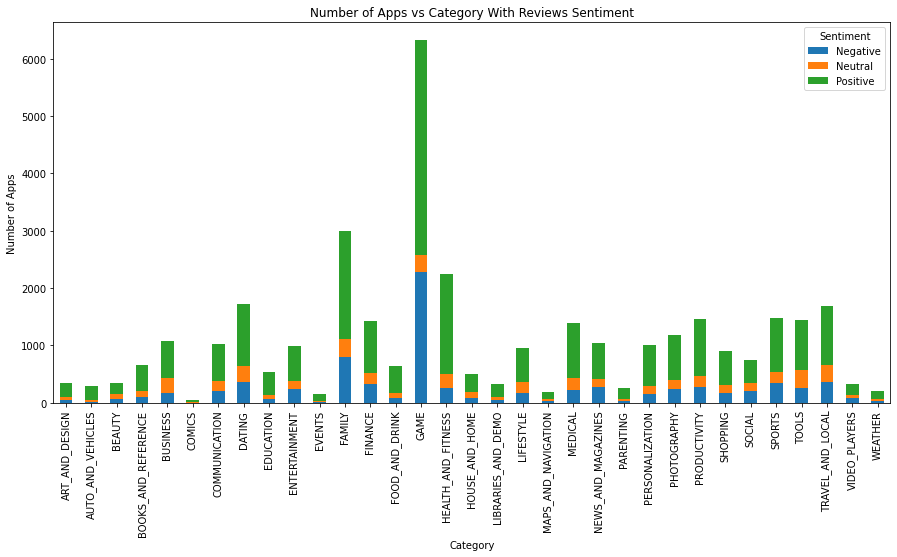

In [ ]:
cat_sentiment.plot(kind = 'bar', stacked = True, figsize=(15,7))
plt.title("Number of Apps vs Category With Reviews Sentiment")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

Top 5 Categories with most positive reviews are - GAME, FAMILY, HEALTH_AND_FITNESS, DATING, TRAVEL_AND_LOCAL.

##Apps with the highest number of positive reviews

In [ ]:
positive_ur_df=user_df[user_df['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


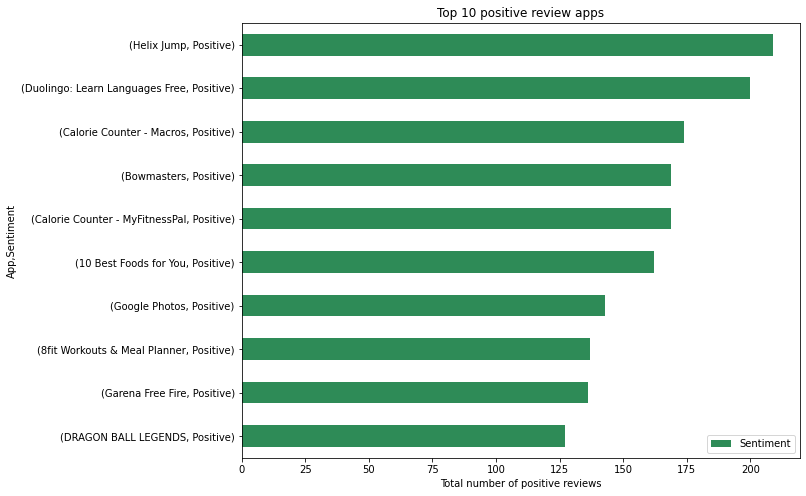

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

##Apps with the highest number of negative reviews.

In [ ]:
negative_ur_df=user_df[user_df['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


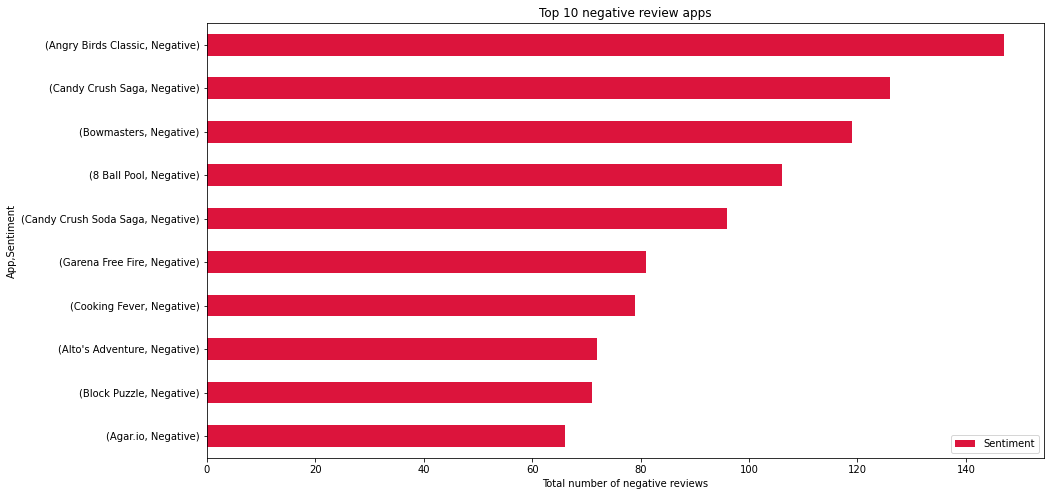

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')

plt.legend()

##Correlation heat map for the final play store dataset.

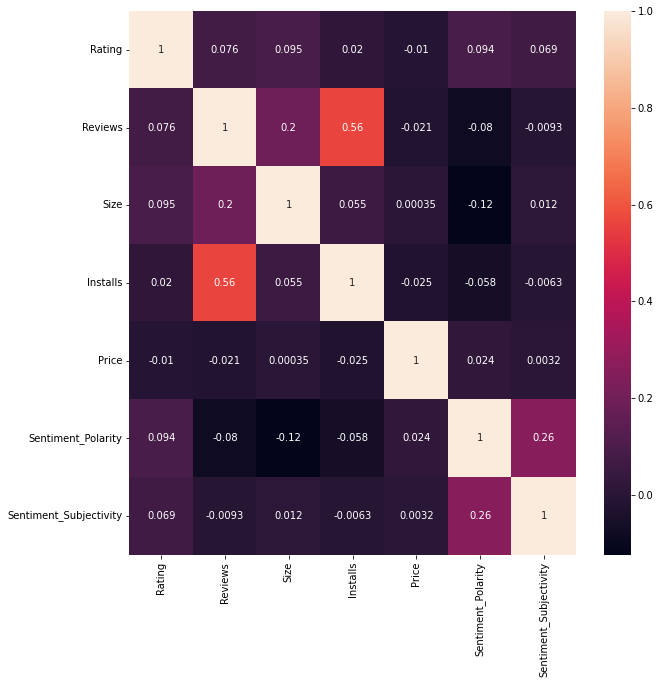

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(final_df.corr(), annot = True)
plt.show()

Relationship between Install and Reviews is 0.56

In [ ]:
#Top 5 most reviewed apps.
play_store_df.nlargest(5, 'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1704,Clash of Clans,GAME,4.6,44891723.0,98000.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up


In [ ]:
#Top 5 most largest size app.
play_store_df.nlargest(5, 'Size')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419.0,100000.0,1000000.0,Paid,0.99,Everyone 10+,Action,2018-08-03,2.3.24,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124.0,100000.0,5000.0,Free,0.00,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up
5530,The Walking Dead: Our World,GAME,4.0,22435.0,100000.0,1000000.0,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542.0,100000.0,100000000.0,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up
1080,Post Bank,FINANCE,4.5,60449.0,100000.0,1000000.0,Free,0.00,Everyone,Finance,2018-07-23,2.9.12,4.0 and up


#**Conclusion:**
In this EDA the given datasets are analysed and several graphs has been plotted which can be used to give more insights to the dataset.

* Distribution of Size shows most of the apps present in the play store are of smaller size.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Most of the apps present in the play store are available for everyone, there are very few apps which are having age restrictions. 
* Content Rating Teen is having highest number of installs.
    * It shows that the present youths are quite good at operating apps and thus developers can develop more apps which suits to the interest of the teens.
* Number of free apps present in the play store are higher than paid apps.
    * It's quite evident users prefer to install free apps more as compared to the paid apps.
    * This gives direction that the developers can launch more of the free apps and for earning money.
    * They can use other means such as through advertisements in the apps or monetizing certain section of the app which serves certain special purpose or any other means.
* Game category has a greater number of positive reviews as well as negative reviews since there is more installs from the Game category.
* From the correlation matrix we can infer that reviews and installs are having a good correlation.
  * It's quite evident as the more number of installs more will be the number of reviews. 
* Sentiment Polarity and Sentiment Subjectivity are slightly correlated.


The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original rating of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.